In [1]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 43.1 MB/s 
     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 448 kB 44.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  15116      0 --:--:-- --:--:-- --:--:-- 15116


In [3]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

In [4]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0  10.9M      0  0:00:01  0:00:01 --:--:-- 10.9M


In [20]:
import pandas as pd

total_data = pd.read_table('./naver_shopping.txt', names=['ratings', 'reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [7]:
total_data.info()

# RangeIndex = Non-null = 200000 -> 결측치가 없다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [9]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)  # inplace -> 변수를 덮어쓰기
len(total_data)

# 중복값 제거. 전체 값 200000에서 줄었음

199908

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149931,), (149931,), (49977,), (49977,))

In [19]:
y_data.value_counts()

5    81170
2    63948
1    36007
4    18783
Name: ratings, dtype: int64

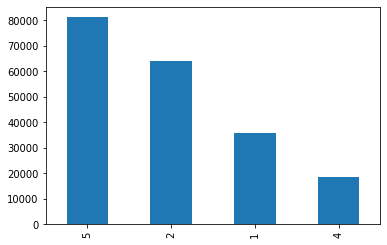

In [21]:
y_data.value_counts().plot(kind='bar')

# NLP

In [22]:
from konlpy.tag import  Mecab

In [23]:
mecab = Mecab()
print( mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.') )

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [25]:
x_train_small = x_train[0:5000]

In [30]:
sentence= list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small:
  encoded = mecab.morphs(tok)

  # 불용어 처리
  sentence.append([ item for item in encoded if item not in stopwords ])
  # for item in encoded:
  #   if item not in stopwords:
  #     sentence.append(item)

print(sentence)

[['기본', '적', '약속', '안', '지키', '서비스', '엉망', '네요'], ['발색', '굉장히', '진하', '활용', '높', '아요', '쉐', '딩', '이랑', '블러', '셔', '로', '활용', '가능', '네요'], ['배송', '늦', '어도', '너무', '느림', '.', '무슨', '국내', '배송', '일', '주일', '가까이', '걸린다는', '말', '안', '됨', '.'], ['좋', '아', '여', 'ㅜ양이', '조금', '적', '거', '뺘곤'], ['재', '구매', '만족', '해', '여', 'ㅎㅎ', '배송굿'], ['달', '넘', '사용', '후기', '올려', '봅니다', '여전히', '아주', '잘', '사용', '구', '있', '구', '여', '조수석', '앞쪽', '핸드백', '(', '조수석', '누군가', '앉', '땐', '뒷', '쪽', '으로', '휙', '돌리', '면', '됩니다', '~', 'ㅎ', ')', '아', '~~', '주', '편리', '함', '운전석', '뒷', '쪽', '쇼핑백', '여기저기', '입소문', '내', '싶', '제품', '입니다'], ['생각', '보다', '튼튼', '좋', '아요', '근데', '.', '..', '구두', '올려', '놓', '으니', '굽', '틈새', '로', '자꾸', '들어가', '네요', 'ㅋㅋ', '그', '불편', '것', '만', '제외', '면', '튼튼', '좋', '아요'], ['현재', '회사', '있', '의자', '곡선', '있', '라인', '라', '그', '상태', '에서', '등', '쿠션', '니', '허리', '만', '닿', '윗', '등', '의자', '안', '닿', '붕', '떠', '있', '어서', '너무', '불편', '네요', '.', '..', '돈', '너무', '아깝', '네요', '.', '.'], ['슬리퍼', '너무', '별로', '입니다'], ['생각', 

# Tokenize

In [32]:
import tensorflow as tf

In [35]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentence) 

In [ ]:
tokenizer.word_index  # 사전 만들기

In [ ]:
tokenizer.word_counts  # 전체 문장에서 단어가 몇번 반복됐는지 

In [39]:
total_cnt = len(tokenizer.word_index)  
rare_cnt = 0 #  2 미만으로 사용된 단어
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():  # word_counts가 딕셔너리로 되있어서 뽑을 수 있음
  total_freq = total_freq + value
  if value <= 2:
      rare_cnt =  rare_cnt + 1
      rare_freq = rare_freq + value  


In [41]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

# 전체 단어 수, 희귀 단어 수, 희귀 단어의 비중, 희귀 단어가 전체 단어 중에서 등장하는 빈도 비중

(8166, 5366, 65.71148665197158, 7.818209953695438)

In [44]:
vocab_size = total_cnt - rare_cnt  # 사전 단어 수

In [49]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentence)

In [50]:
x_train_small = tokenizer.texts_to_sequences(sentence)
print(x_train_small[0:3])

[[643, 129, 1, 11, 1566, 550, 448, 3], [1822, 849, 1823, 992, 671, 7, 1, 915, 235, 1, 1824, 31, 992, 570, 3], [12, 244, 291, 13, 1353, 2, 714, 1567, 12, 104, 436, 1825, 1, 225, 11, 449, 2]]


In [52]:
len(x_train_small[0]), len(x_train_small[15]), len(x_train_small[40])

(8, 27, 12)

In [53]:
hist_len = [ len(words) for words in x_train_small ]

(array([ 17.,  63., 167., 604., 341., 334., 276., 500., 183., 177., 150.,
        256., 105., 126.,  99., 194.,  85.,  74., 106., 169.,  71.,  56.,
         52., 151.,  48.,  48.,  79.,  39.,  29.,  32.,  67.,  34.,  33.,
         27.,  51.,  16.,  15.,  16.,  20.,  15.,  11.,  12.,  23.,   4.,
          5.,   3.,   9.,   3.,   0.,   5.]),
 array([ 1.  ,  2.26,  3.52,  4.78,  6.04,  7.3 ,  8.56,  9.82, 11.08,
        12.34, 13.6 , 14.86, 16.12, 17.38, 18.64, 19.9 , 21.16, 22.42,
        23.68, 24.94, 26.2 , 27.46, 28.72, 29.98, 31.24, 32.5 , 33.76,
        35.02, 36.28, 37.54, 38.8 , 40.06, 41.32, 42.58, 43.84, 45.1 ,
        46.36, 47.62, 48.88, 50.14, 51.4 , 52.66, 53.92, 55.18, 56.44,
        57.7 , 58.96, 60.22, 61.48, 62.74, 64.  ]),
 <a list of 50 Patch objects>)

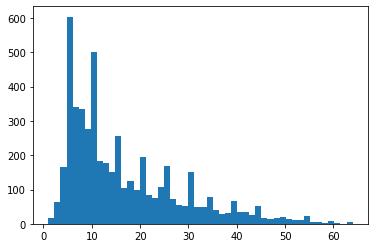

In [55]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins=50)

In [56]:
sum(hist_len) / len(x_train_small)

16.8018

In [57]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [58]:
y_train_small = y_train[0:5000]

In [59]:
import numpy as np

np.unique(y_train_small)

array([1, 2, 4, 5])

# Make model

In [62]:
model = tf.keras.Sequential()

# Input Layer 
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim=30, input_length=50))

# Hidden Layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128) ))

# Output Layer
model.add(tf.keras.layers.Dense(5, activation='softmax'))

# Gadget
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [63]:
model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3)

Epoch 1/3


InvalidArgumentError: ignored